In [1]:
# 1
import pandas as pd

# df = pd.read_csv('Mall_Customers.csv')
df = pd.read_csv('Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
0,1,Male,19,15000,39,Healthcare,1,4
1,2,Male,21,35000,81,Engineer,3,3
2,3,Female,20,86000,6,Engineer,1,1
3,4,Female,23,59000,77,Lawyer,0,2
4,5,Female,31,38000,40,Entertainment,2,6


In [2]:
# Изменяем данные
df.drop('CustomerID', axis=1, inplace=True)
df.Gender.replace({'Male':1, 'Female':0}, inplace=True)
professions_dict = dict(enumerate(df['Profession'].unique()))
print(professions_dict)
df['Profession'] = pd.factorize(df['Profession'])[0]
df.head()

{0: 'Healthcare', 1: 'Engineer', 2: 'Lawyer', 3: 'Entertainment', 4: 'Artist', 5: 'Executive', 6: 'Doctor', 7: 'Homemaker', 8: 'Marketing', 9: nan}


,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
0,1,19,15000,39,0,1,4
1,1,21,35000,81,1,3,3
2,0,20,86000,6,1,1,1
3,0,23,59000,77,2,0,2
4,0,31,38000,40,3,2,6


In [3]:
# Нормализация данных, но в методичке делали без нормализации (⊙_⊙)？
# У меня без нормализации не работало (украинский флаг был https://imgur.com/eJJlGpz)
# Нормализация данных
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)
scaled_df = pd.DataFrame(scaled_data, columns=df.columns)
scaled_df.head()

,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
0,1.207064,-1.054089,-2.093501,-0.428339,-1.422933,-0.791207,0.117497
1,1.207064,-0.983723,-1.656133,1.075546,-0.978891,-0.281162,-0.390051
2,-0.828457,-1.018906,-0.540845,-1.609962,-0.978891,-0.791207,-1.405148
3,-0.828457,-0.913356,-1.131292,0.932319,-0.534849,-1.046230,-0.897599
4,-0.828457,-0.631891,-1.590528,-0.392532,-0.090807,-0.536185,1.132594


In [4]:
# 5
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import plotly.graph_objects as go

# Визуализация через T-SNE
def T_SNE_visualisation():
  tsne = TSNE(n_components=2, random_state=42)
  tsne_data = tsne.fit_transform(scaled_df)
  tsne_df = pd.DataFrame(tsne_data, columns=['Component 1', 'Component 2'])
  plt.figure(figsize=(8, 6))
  scatter = plt.scatter(
      tsne_df['Component 1'],
      tsne_df['Component 2'],
      c=df['Cluster'],
      cmap='viridis')
  plt.title('t-SNE Visualization of Clustered Data')
  plt.xlabel('Component 1')
  plt.ylabel('Component 2')
  plt.colorbar(scatter, label='Cluster')
  plt.show()


# Визуализация для трехмерных данных
def matplotlib_visualisation():
  fig = go.Figure(
      data=[
          go.Scatter3d(
              x=scaled_df['Age'],
              y=scaled_df['Spending Score (1-100)'],
              z=scaled_df['Annual Income ($)'],
              mode='markers',
              marker_color=df['Cluster'],
              marker_size = 4)])
  fig.show()

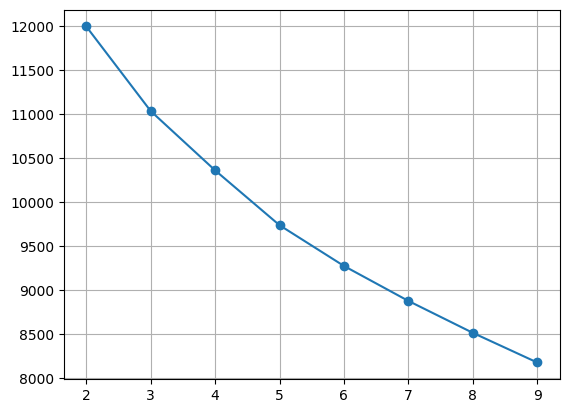

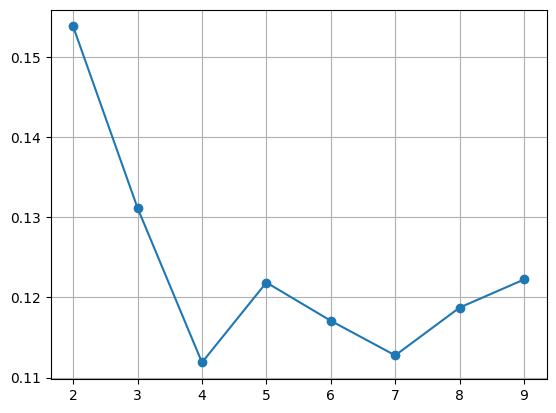

[[-8.28456783e-01 -4.82241526e-03 -3.89490248e-03  4.37017757e-04
   1.47750683e-02 -1.71086516e-02 -1.88725809e-04]
 [ 1.20706357e+00  7.02627088e-03  5.67488248e-03 -6.36735946e-04
  -2.15273108e-02  2.49273473e-02  2.74973967e-04]]
0    1186
1     814
Name: Cluster, dtype: int64


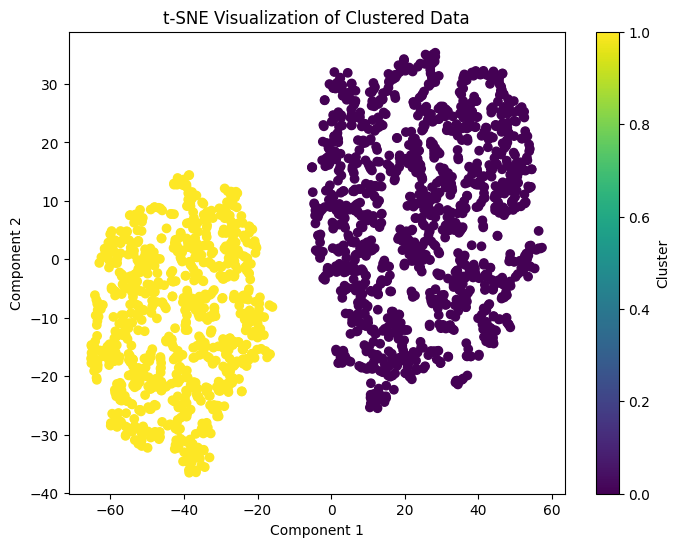

In [9]:
# 2
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
import numpy as np

# Кластеризация с использованием KMeans
models = []
score1 = []
score2 = []
for i in range(2,10):
  model = KMeans(
      n_clusters=i,
      random_state=123,
      init='k-means++',
      n_init=10
      ).fit(scaled_df)
  models.append(model)
  score1.append(model.inertia_)
  score2.append(silhouette_score(scaled_df, model.labels_))

plt.grid()
plt.plot(np.arange(2,10), score1, marker = 'o')
plt.show()

plt.grid()
plt.plot(np.arange(2,10), score2, marker = 'o')
plt.show()

model1 = KMeans(n_clusters=2,random_state=123, init='k-means++', n_init=10)
model1.fit(scaled_df)
print(model1.cluster_centers_)

labels = model1.labels_
df['Cluster'] = labels
print(df['Cluster'].value_counts())

T_SNE_visualisation()
matplotlib_visualisation()

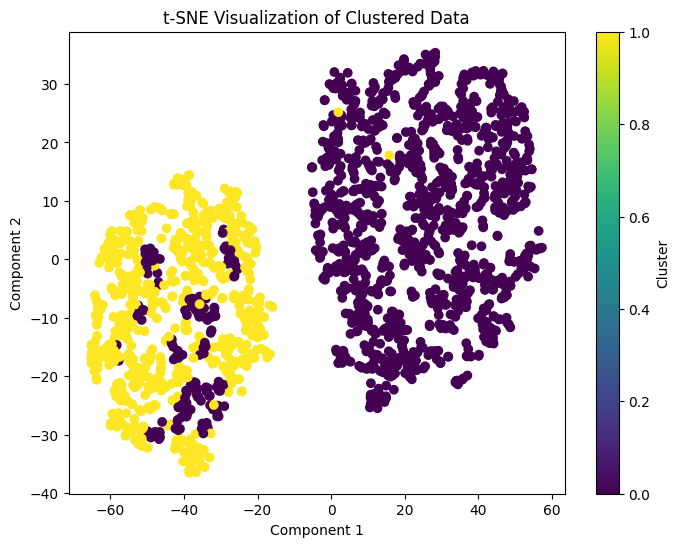

In [10]:
# 3
from sklearn.cluster import AgglomerativeClustering

model2 = AgglomerativeClustering(2,compute_distances=True)
clastering = model2.fit(scaled_df)
df['Cluster']=clastering.labels_

T_SNE_visualisation()
matplotlib_visualisation()

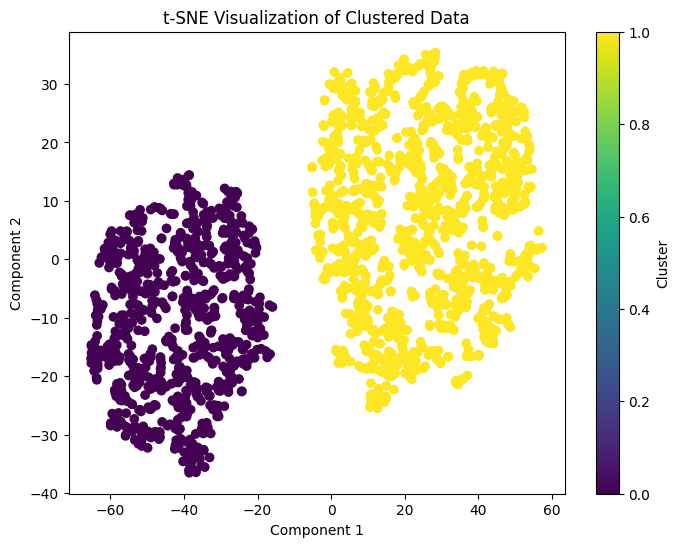

In [7]:
# 4
from sklearn.cluster import DBSCAN

model3 = DBSCAN(eps=2, min_samples=5, leaf_size=30).fit(scaled_df)
df['Cluster'] = model3.labels_

T_SNE_visualisation()
matplotlib_visualisation()